# Introduction

For this analysis we are going to use data from Ford GoBike trips obtained during 2017 and until July 2018. This is a regional public bicycle sharing system in the San Francisco Bay Area, California. It comes as an alternative of automobile transportation in this crowded area, counts with over 7000 bikes around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. You can ride as a costumer paying for one 30 minute trip or for unlimited 30 minute trips for a day or as a subscriber paying a monthly membership. The system also offers the Bike Share For All program for low-income residents. For more information see the link: [Ford GoBike](https://www.fordgobike.com/)

# Data Ingestion

In this stage of the analysis we consider the next steps in data ingestion:

## Dataset

The extention of our dataset are csv files, in total we have 8 files, the first contains the data of 2017 and the rest, the data of every month of 2018 until July, giving a total size of 323 MB. In the code below we import pandas for a dataframe visualization of the dataset, then each csv file is assign to a variable using the *read_csv* function and finally we concatenate     

In [98]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv",parse_dates=True)
df2 = pd.read_csv("data/201801-fordgobike-tripdata.csv",parse_dates=True)
df3 = pd.read_csv("data/201802-fordgobike-tripdata.csv",parse_dates=True)
df4 = pd.read_csv("data/201803-fordgobike-tripdata.csv",parse_dates=True)
df5 = pd.read_csv("data/201804-fordgobike-tripdata.csv",parse_dates=True)
df6 = pd.read_csv("data/201805-fordgobike-tripdata.csv",parse_dates=True)
df7 = pd.read_csv("data/201806-fordgobike-tripdata.csv",parse_dates=True)
df8 = pd.read_csv("data/201807-fordgobike-tripdata.csv",parse_dates=True)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=0)

C:\Users\Laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if sys.path[0] == '':


Now we get the head of the dataset:

In [4]:
sort = False
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


The features of the dataset include personal information of the user such as year of birth, gender, user type (customer or subscriber) and whether or not the user is enrolled in the Bike Share For All program. It also has information of the trip like the bike id, location, name and id of the start and end station, duration and date of the trip.

# Explorative Data Analysis

This stage is our first interaction with the dataset, in here we get to know how many observations and features we have and their type. We can also study possible correlations and try different types of data visualizations like histograms and boxplots. This stage can be divided in structure and content analysis.

## Structure Analysis

A continuación, vamos a determinar algunas características básicas de estructura de la base de datos: 

First, we observe that the data set consists of 1538086 observations and 16 features.


In [16]:
print(df.shape)

(1538086, 16)


Below we can see the name of each feature and the type of data it contains. 

In [17]:
df.dtypes

bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object

We can also see the amount of non-null observations of each feature, the "bike_share_for_all_trip" feature has less non-null observations than the rest because in 2017 this feature was not measured.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538086 entries, 0 to 199221
Data columns (total 16 columns):
bike_id                    1538086 non-null int64
bike_share_for_all_trip    1018386 non-null object
duration_sec               1538086 non-null int64
end_station_id             1532841 non-null float64
end_station_latitude       1538086 non-null float64
end_station_longitude      1538086 non-null float64
end_station_name           1532841 non-null object
end_time                   1538086 non-null object
member_birth_year          1400419 non-null float64
member_gender              1400760 non-null object
start_station_id           1532841 non-null float64
start_station_latitude     1538086 non-null float64
start_station_longitude    1538086 non-null float64
start_station_name         1532841 non-null object
start_time                 1538086 non-null object
user_type                  1538086 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 199.5+ MB


## Content Analysis

Now we analize content aspects as basic statistics, distribution of the features and count of values for categorical features.

Below we can see the basic statistics for the quantitative features in the dataset, 


In [19]:
df.describe()


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.538086e+06,1.538086e+06,1.532841e+06,1.538086e+06,1.538086e+06,1.400419e+06,1.532841e+06,1.538086e+06,1.538086e+06
mean,2.020603e+03,9.573795e+02,1.056254e+02,3.776912e+01,-1.223547e+02,1.981805e+03,1.076984e+02,3.776897e+01,-1.223553e+02
std,1.152290e+03,2.891834e+03,9.259640e+01,9.756527e-02,1.517343e-01,1.056463e+01,9.297119e+01,9.766799e-02,1.521276e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.728000e+01,-1.224443e+02,1.881000e+03,3.000000e+00,3.731285e+01,-1.224443e+02
25%,1.045000e+03,3.610000e+02,2.700000e+01,3.777241e+01,-1.224103e+02,1.976000e+03,2.800000e+01,3.777179e+01,-1.224117e+02
50%,2.072000e+03,5.690000e+02,7.700000e+01,3.778240e+01,-1.223974e+02,1.984000e+03,7.900000e+01,3.778175e+01,-1.223984e+02
75%,2.952000e+03,8.970000e+02,1.710000e+02,3.779539e+01,-1.223881e+02,1.989000e+03,1.730000e+02,3.779539e+01,-1.223881e+02
max,4.307000e+03,8.636900e+04,3.570000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.570000e+02,4.551000e+01,-7.357000e+01


De la información anterior podemos observar que estaremos trabajando con un total de 1 538 086 observaciones y 16 variables o características. Los tipos de variables son bastante diversas, algunas de ellas son numéricas, como la duración en segundos del viaje, la latitud y longitud de la estación de partida y llegada. Sin embargo también contamos con variables categóricas como el género del usuario, el tipo de usuario, si este compartió la misma bicicleta durante todo el viaje **REVISAR**, e incluso de tipo string como el nombre de la estación de salida y llegada. 

Vamos ahora a explorar la distribución de algunas de las variables de la base mediante histogramas. 

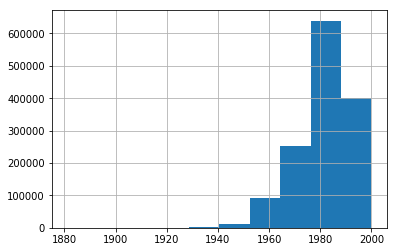

In [20]:
df['member_birth_year'].hist()

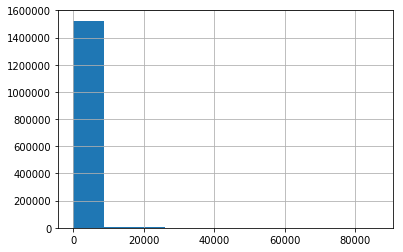

In [21]:
df['duration_sec'].hist()

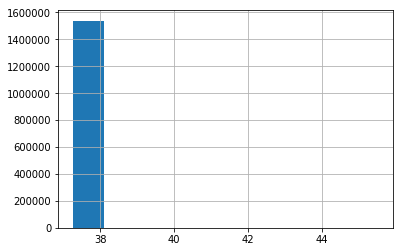

In [22]:
df['end_station_latitude'].hist()

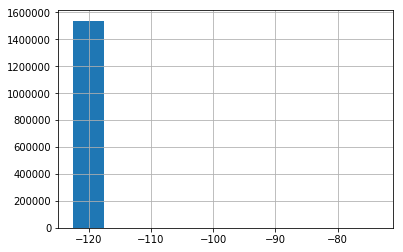

In [23]:
df['end_station_longitude'].hist()

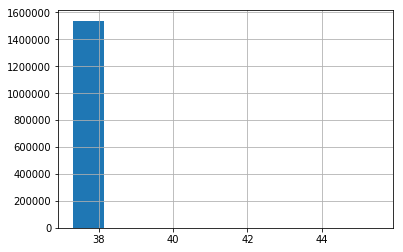

In [24]:
df['start_station_latitude'].hist()

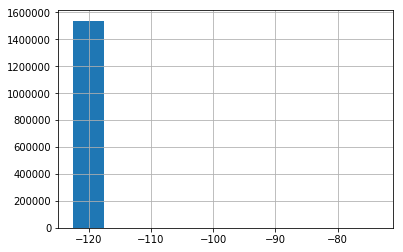

In [25]:
df['start_station_longitude'].hist()

En general se puede observar que la latitud y longitud, tanto de las estaciones iniciales como las de llegada, poseen una distribución bastante asimétrica, pues esta se acumula principalmente a la izquierda. Algo similar sucede con la distribución de la duración en segundos de los viajes, pues en su mayoría se concentran entre 0 y 1000. 

Por otro lado, la información siguiente nos permite observar que los usuarios son en su mayoría hombres y además son más los miembros subscritos que clientes casuales quienes utilizan las bicicletas. Asimismo la mayoría de usuarios no compartieron la bicicleta durante todo el viaje *NO ESTOY SEGURA DE QUÉ SIGNIFICA ESTA ÚLTIMA VARIABLE, REVISAR*.

In [26]:
print(df.groupby("member_gender").size())
print(df.groupby("user_type").size())
print(df.groupby("bike_share_for_all_trip").size())

member_gender
Female     336222
Male      1043512
Other       21026
dtype: int64
user_type
Customer       271263
Subscriber    1266823
dtype: int64
bike_share_for_all_trip
No     934032
Yes     84354
dtype: int64


En las siguientes líneas de código vemos cuál es el máximo y mínimo número de veces que una estación de llegada o salida ha sido visitada por un usuario. Además se crearon unos histogramas que aproximan la distribución de la cantidad de veces que la estación de llegada o salida ha sido visitada, de donde se puede inferir que prácticamente las estaciones de llegada más visitadas son también las estaciones de salida más visitadas por los usuarios. Esta última idea será retomada más adelante con ayuda de algunos gráficos de dispersión. 

In [27]:
df['end_station_id'].value_counts().max()


43013

In [28]:
df['end_station_id'].value_counts().min()


5

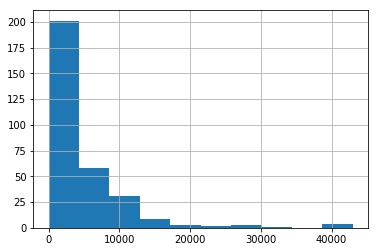

In [29]:
df['end_station_id'].value_counts().hist()

In [44]:
df['start_station_id'].value_counts().max()


37401

In [45]:
df['start_station_id'].value_counts().min()

2

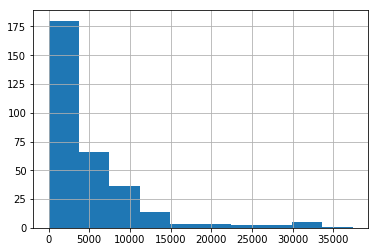

In [57]:
df['start_station_id'].value_counts().hist()

Las distribuciones de las variables también pueden ser aproximadas por medio de boxplots, en donde se pueden observar más fácilmente outliers. Por lo que en los siguientes gráficos se presentan boxplots de las variables de la base de datos. 

957.3794950347379

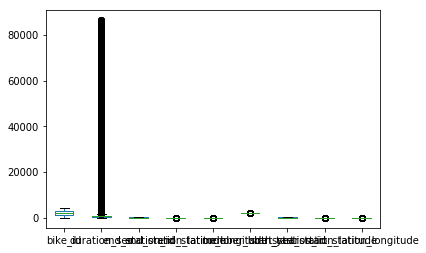

In [67]:
df.plot(kind='box')
df["duration_sec"].mean()

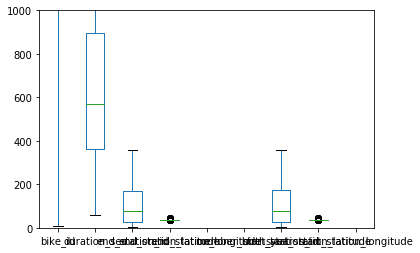

In [66]:
df.plot(kind='box',ylim=[0,1000])

Uno de las características que sobresale de los gráficos anteriores es que existen algunos outliers para la variable duración en segundos del viaje, pues apersa de que la mayoría de las observaciones se encuentran alrededor entre 300 y 1000, e incluso su media es 957,38 segundos, existen observaciones de hasta más de 8000 segundos. 

Finalmente, es importante conocer la relación que existe entre las variables con las que se está trabajando, por lo que se calculó la matriz de correlación entre las variables numéricas.

In [71]:
df.corr()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
bike_id,1.000000,-0.009014,-0.053438,0.020492,-0.064389,0.018801,-0.055265,0.020229,-0.064182
duration_sec,-0.009014,1.000000,-0.004209,0.001224,-0.004224,0.003733,-0.010187,0.000621,-0.003259
end_station_id,-0.053438,-0.004209,1.000000,-0.317472,0.625223,0.106103,0.541569,-0.295858,0.631242
end_station_latitude,0.020492,0.001224,-0.317472,1.000000,-0.477717,-0.074020,-0.292187,0.990668,-0.477264
end_station_longitude,-0.064389,-0.004224,0.625223,-0.477717,1.000000,0.070869,0.616172,-0.476294,0.996212
member_birth_year,0.018801,0.003733,0.106103,-0.074020,0.070869,1.000000,0.107115,-0.073836,0.070216
start_station_id,-0.055265,-0.010187,0.541569,-0.292187,0.616172,0.107115,1.000000,-0.305187,0.613084
start_station_latitude,0.020229,0.000621,-0.295858,0.990668,-0.476294,-0.073836,-0.305187,1.000000,-0.473076
start_station_longitude,-0.064182,-0.003259,0.631242,-0.477264,0.996212,0.070216,0.613084,-0.473076,1.000000


Es fácil observar que la latitud entre las estaciones de salida y llegada de los usuarios tienen una correlación lineal bastante elevada, pues es muy cercana a 1. Lo mismo sucede en el caso de la longitud. Para ilustrar esto se realizó gráficos de dispersión entre las variables en cuestión y es fácil observar la relación mencionada anteriormente, pues en general conforme mayor es la latitud de la estación de salida, mayor es la latitud de la estación de llegada, y lo mismo para la longitud, con una especial concentración en los valores menores.
Esto último se complementa con los histogramas que se observaron anteriormente acerca de la distribución de la latitud y longitud de las estaciones de salida y llegada, pues se observó una acumulación importante en los valores más pequeños. Otra de las ideas que se refuerzan con esta acumulación de puntos, es que las estaciones de salida que más se utilizan son también las estaciones de llegada más utilizadas, como se pudo observar en histogramas anteriores. 
Y finalmente, algo que logra explicar la alta correlación entre la latitud así como la longitud de las estaciones de salida y llegada de cada usuario es que; como ya se señaló, los recorridos tienen en promedio una duración bastante corta, por lo que no es extraño que la estación de llegada de un usuario esté muy cerca de la que salió minutos antes. 


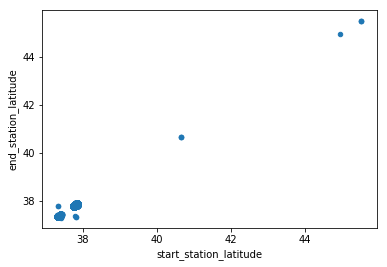

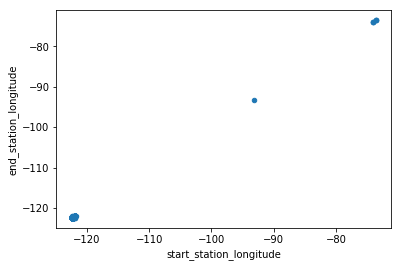

In [69]:
df.plot.scatter(x='start_station_latitude', y='end_station_latitude')
df.plot.scatter(x='start_station_longitude', y='end_station_longitude')

# Data Cleaning and Transformation

## Normalization

Normalization processes should be applied to all Datasets, with the purpose that the magnitude and representation of the data will not be the cause of poor results.

For this, the separation of the numerical and categorical attributes must be done, because the content of both is completely incompatible.

Therefore, the normalization "One-hot encoding" is applied to the categorical attributes and "z-score" normalization to the numerical attributes.

In [30]:
## The initial dataset is presented, to remember its structure and content
df

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,Customer
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,Customer
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,Customer
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,Customer


The dummies technique is applied to certain categorical attributes.

In this dataset an attribute to which it is advisable to apply "one-hot encoding" is to the user type column "user_type", since it has only two categories.

In [99]:
dummies_user_type = pd.get_dummies(df.user_type)
dummies_user_type.head()

,Customer,Subscriber
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


Then you must concatenate the new columns to the dataset and delete the column to which dummies are applied.

In [100]:
#It is concatenated
merged_user_type = pd.concat([df, dummies_user_type],axis='columns')
merged_user_type

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,Customer,Subscriber
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer,1,0
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer,1,0
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer,1,0
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer,1,0
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber,0,1
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,Customer,1,0
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer,1,0
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,Customer,1,0
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,Customer,1,0
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,Customer,1,0


In [101]:
#The dummies column is removed
df_temporal = merged_user_type.drop(['user_type'], axis='columns')
df_temporal.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,Customer,Subscriber
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,1,0
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,1,0
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,1,0
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,1,0
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,0,1


The same applies to the person's gender column

In [102]:
dummies_member_gender = pd.get_dummies(df.member_gender)
dummies_member_gender.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,0,0


In the case of numerical attributes or columns, the standard normalization is applied, which consists in subtracting its mean from the data and dividing it by the standard deviation.

In [103]:
from scipy.stats import zscore
colum='duration_sec'
df_temporal['zscores_duration'] = (df_temporal[colum] - df_temporal[colum].mean())/df_temporal[colum].std(ddof=0)
df_temporal

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,Customer,Subscriber,zscores_duration
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,1,0,27.371085
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,1,0,26.918085
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,1,0,15.495574
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,1,0,21.168100
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,0,1,14.746914
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,1,0,2.859300
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,1,0,1.227464
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,1,0,1.167640
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,1,0,1.104013
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,1,0,1.134443


## Null Values Treatment

In the following section, the null values will be treated so that they do not affect the results of the predictions of the models.

It starts showing the total sum of all null values in all dataset columns

In [81]:
df_temporal.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id               5245
end_station_latitude            0
end_station_longitude           0
end_station_name             5245
end_time                        0
member_birth_year          137667
member_gender              137326
start_station_id             5245
start_station_latitude          0
start_station_longitude         0
start_station_name           5245
start_time                      0
Customer                        0
Subscriber                      0
zscores_duration                0
dtype: int64

In [11]:
#individual observation of a specific column
df_temporal['member_birth_year'].isnull().sum()

137667

In [104]:
media = df_temporal['member_birth_year'].mean()
mediana = df_temporal['member_birth_year'].median()
modo = df_temporal['member_birth_year'].mode()
print('media',media)
print('mediana',mediana)
print('modo',modo)

media 1981.804579200939
mediana 1984.0
modo 0    1988.0
dtype: float64


In [105]:
#the nulls are replaced by the median
df_temporal['member_birth_year'] = df_temporal['member_birth_year'].replace(np.NaN, mediana)

In [14]:
#the changes in the null table are observed
df_temporal.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id               5245
end_station_latitude            0
end_station_longitude           0
end_station_name             5245
end_time                        0
member_birth_year               0
member_gender              137326
start_station_id             5245
start_station_latitude          0
start_station_longitude         0
start_station_name           5245
start_time                      0
Customer                        0
Subscriber                      0
zscores_duration                0
dtype: int64

In [88]:
df_temporal

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,Customer,Subscriber,zscores_duration
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,1,0,27.371085
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,1,0,26.918085
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,1984.0,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,1,0,15.495574
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,1984.0,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,1,0,21.168100
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,0,1,14.746914
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,1984.0,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,1,0,2.859300
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,1,0,1.227464
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,1984.0,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,1,0,1.167640
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,1984.0,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,1,0,1.104013
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,1984.0,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,1,0,1.134443


In [106]:
#the null values of the gender column are replaced by the third category "other"
df_temporal['member_gender'] = df_temporal['member_gender'].fillna('Other')

In [90]:
df_temporal

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,Customer,Subscriber,zscores_duration
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,1,0,27.371085
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,1,0,26.918085
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,1984.0,Other,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,1,0,15.495574
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,1984.0,Other,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,1,0,21.168100
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,0,1,14.746914
5,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,1984.0,Other,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,1,0,2.859300
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,1,0,1.227464
7,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,1984.0,Other,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,1,0,1.167640
8,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,1984.0,Other,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,1,0,1.104013
9,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,1984.0,Other,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,1,0,1.134443


In [107]:
#Dummies and one-hot encoding to the gender column are applied again
dummies_member_gender = pd.get_dummies(df_temporal.member_gender)
dummies_member_gender.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [108]:
#It is concatenated
merged_gender = pd.concat([df_temporal, dummies_member_gender],axis='columns')
merged_gender
#The dummies column is removed
df_temporal = merged_gender.drop(['member_gender'], axis='columns')
df_temporal.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,Customer,Subscriber,zscores_duration,Female,Male,Other
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,1,0,27.371085,0,1,0
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,1,0,26.918085,1,0,0
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,1984.0,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,1,0,15.495574,0,0,1
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,1984.0,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,1,0,21.168100,0,0,1
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,0,1,14.746914,1,0,0


In [8]:
df_temporal.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id               5245
end_station_latitude            0
end_station_longitude           0
end_station_name             5245
end_time                        0
member_birth_year          137667
member_gender              137326
start_station_id             5245
start_station_latitude          0
start_station_longitude         0
start_station_name           5245
start_time                      0
Customer                        0
Subscriber                      0
zscores_duration                0
dtype: int64

In [109]:
media = df_temporal['start_station_id'].mean()
media

107.69844621849234

## Outliers Treatment

As it was commented in the section of EDA, we observed some strange observations with the histogram of the user´s birth year, because there were years like 1881, which means that someone with 136 or 137 years old was using the bicycle. This seemed to be a mistake but as we can observe in the next lines, there are also similar years like 1886, 1889. 

As they are a few observations maybe we can consider that actually elderly people attended to the company and used a bike, so we have decided to keep these observations. 

In [21]:
print(df_temporal.groupby("member_birth_year").size())

member_birth_year
1881.0        5
1886.0        2
1889.0        3
1900.0      510
1901.0       12
1902.0      326
1904.0        6
1906.0        1
1907.0        7
1909.0        4
1911.0      255
1920.0       52
1924.0      194
1927.0        2
1928.0       49
1930.0        1
1932.0       11
1933.0      181
1934.0       93
1935.0      237
1936.0      303
1938.0       52
1939.0       50
1940.0       64
1941.0      100
1942.0      257
1943.0      475
1944.0      446
1945.0     1196
1946.0      287
          ...  
1971.0    21858
1972.0    18352
1973.0    23785
1974.0    25420
1975.0    31489
1976.0    25098
1977.0    32436
1978.0    31999
1979.0    35017
1980.0    41945
1981.0    42818
1982.0    58122
1983.0    56486
1984.0    62410
1985.0    68369
1986.0    60750
1987.0    70696
1988.0    78176
1989.0    65769
1990.0    60212
1991.0    56188
1992.0    47090
1993.0    52521
1994.0    37826
1995.0    29966
1996.0    17558
1997.0    15904
1998.0    11681
1999.0     6510
2000.0      812
Length

Another possible case of outliers adressed in the section of EDA was related to the "duration in seconds" feature, because we could appreciate how its boxplot showed evidence of some bigger values than expected. 
However, now we have found that actually there are many observations with high duration. That means that even though it is not common to see an user using the bike for a long trip, it happened on repeated cases, so it is not fair to delete these observations, actually they are contributing with important information about the behaviour of the duration time in seconds feature of the dataset. 

In [22]:
print(df_temporal.groupby("duration_sec").size())


duration_sec
61       198
62       166
63       218
64       197
65       204
66       226
67       229
68       219
69       182
70       213
71       221
72       218
73       206
74       241
75       237
76       239
77       252
78       262
79       268
80       245
81       269
82       273
83       293
84       270
85       286
86       298
87       332
88       311
89       323
90       333
        ... 
85491      1
85546      1
85566      1
85583      1
85683      1
85727      1
85736      1
85765      1
85779      1
85786      1
85813      1
85844      1
85864      1
85972      1
85975      1
85978      1
86003      1
86010      1
86075      1
86135      1
86142      1
86199      1
86208      1
86228      1
86252      1
86281      1
86325      1
86355      1
86366      1
86369      1
Length: 18686, dtype: int64


# Machine Learning 

## Clustering 

Clustering is a non supervised machine learning method, which means that we do not have a dependent or response variable, so our objective is not to predict, but instead to find patterns in the data that allows us to group the data on diferent categories based on the similar or different behavour of the observations. We are going to use the k-means method, in which k centroids are selected randomly and in each iteration, each observation is assigned to the cluster whose centroid is nearer. This process is repeated until no observation changes its cluster assigned, which means that the algorithm has converged. It is easy to find out that this algorithm is very sensitive to the initial random assigment of centroids. So the process should be repeated several times and it should be chosen the results with less error. 

This may sound not very useful, but actually it is. If we were able to find strong patterns that allows us to separate the observations on diffrent groups, then we would be able to treat differently each user depending on the cluster (group) they are classified, in terms of price, preferences, services and so on. This would depend mostly on what are the patterns that allowed separate the users. 

Now, the first thing we are going to do is to delete the features "bike_id", "start_station_name" and "end_station_name" from the dataset. First, the bike id is not relevant to apply clustering since the bike the user used is not relevant at all in order to find patters that can resemble or differentiate that user from others. And about the names of the start and end station are redundant in the dataset since we also have the id of the start and end stations, so they are giving the same information and actually it is easier to work with id's than with the names that are strings. 

Finally, we have have some problems applying clustering using datetime features, because the function only accepts features type string or numerical, so we will have to also delete the features of "start_time" and "end_time". Even though we would like to keep them, we are not losing many information since the duration feature captures almost all of it. 

In [131]:
df_clustering=df_temporal.copy()
df_clustering=df_clustering.drop(columns=['bike_id','start_station_name','end_station_name','start_time','end_time'])

df_clustering.head()

,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude,Customer,Subscriber,zscores_duration,Female,Male,Other
0,NaN,80110,43.0,37.778768,-122.415929,1987.0,74.0,37.776435,-122.426244,1,0,27.371085,0,1,0
1,NaN,78800,96.0,37.766210,-122.426614,1965.0,284.0,37.784872,-122.400876,1,0,26.918085,1,0,0
2,NaN,45768,245.0,37.870348,-122.267764,1984.0,245.0,37.870348,-122.267764,1,0,15.495574,0,0,1
3,NaN,62172,5.0,37.783899,-122.408445,1984.0,60.0,37.774520,-122.409449,1,0,21.168100,0,0,1
4,NaN,43603,247.0,37.867789,-122.265896,1997.0,239.0,37.868813,-122.258764,0,1,14.746914,1,0,0


In order to apply clustering in a proper way, we will also have to make some more of data cleaning. We will delete the observations that still have NA values, because clustering does not accept them.
Also we will have to recode the "bike_share_for_all_trip" feature. 

In [132]:
df_clustering.dropna(axis="rows")
df_clustering=df_clustering[np.isfinite(df_clustering["end_station_id"])]
dummies_bike_share_for_all_trip = pd.get_dummies(df_clustering.bike_share_for_all_trip)
df_clustering = pd.concat([df_clustering, dummies_bike_share_for_all_trip],axis='columns')
df_clustering=df_clustering.drop(['bike_share_for_all_trip'], axis='columns')

Before starting it is important to remember that we should normalize the data, this is important to guarantee that no feature would be more important than other when the clusters are created due to bigger units. 

In [133]:
from sklearn import preprocessing
df_clustering1 = pd.DataFrame(preprocessing.scale(df_clustering.iloc[:,1:16])) 
df_clustering1.columns = list(df_clustering.iloc[:,1:16].columns)

The next step we are going to do is the elbow gragh to help us decide how many clusters should we create based on the errors.
However, here we made the decision of using only 500 000 observations because as the dataset cleaned has more then 1 500 000, whe we run the code using all observations, the execution time was extremely long

Text(0,0.5,'Error')

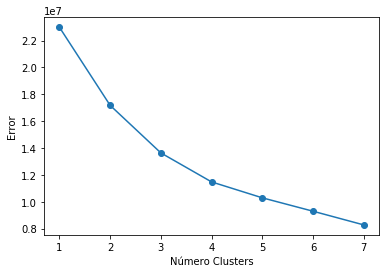

In [138]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
rango_clusters = range(1,8)
error_clusters = []

for num_clusters in rango_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(df_clustering1)
    error_clusters.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters":rango_clusters,"error_clusters":error_clusters})
plt.plot(clusters_df.num_clusters,clusters_df.error_clusters,marker ="o")
plt.xlabel('Número Clusters')
plt.ylabel('Error')

From the elbow graph, we can observe that the variance stabilizes around 4 clusters, because after 44, changes in errors start decreasing. 

In [139]:
kmeans1 = KMeans(n_clusters=4)
clusters = kmeans1.fit_predict(df_clustering1)

As we have many features, it is not possible to observe visually the result of the k-means method. So we have to determine the two main componentes that explain more variance of the data to represent the clusters graphically. 

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(df_clustering1)

scatter(Y[:,0],Y[:,1],  c=clusters)

Finally, as clustering is an non-supervised method, there is no a direct way to measure its results. What we have to do is to use some internal validation metrics such as silhouette. The silhouette method displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess the results. This measure has a range of between -1 and 1. Silhouette coefficients near to 1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_clustering1, clusters)